# NBA Deliverable
## For Mr. Rooney

Write up the results in a separate notebook with supporting visualizations and an overview of how and why you made the choices you did. This should be at least 500 words and should be written for a non-technical audience.

### Summary
In trying to tackle this problem, my goal was to create a data science model that displayed all current NBA players, revealing how well they performed in the 2023-2024 season based on various statistics. I placed each NBA player in a 3D space, allowing me to see where players stand in comparison with each other based on statistics including points, field goal percentage, and total rebounds. In addition to these statistics, I was able to apply a color for every player - this color serves as an indicator of that player's salary. In the visualization in the code below, you can see that the yellow points represent players who earn very high salaries. Orange and pink data points indicate a salary that is middle tier. Data points that are dark purple represent players who are being paid on the low end of the spectrum in comparison to other NBA players.

As one would expect, players with better statistics would have higher salaries and therefore be represented by a yellow/orange bullet point. But my goal here was to find the players with low salaries (purple and blue data points) that had statistics that were comparable to the top performing players. The visualization below allowed me to hand-pick out some of the highest-performing players in the league - although these players are being paid a relatively low salary this season.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.express as px

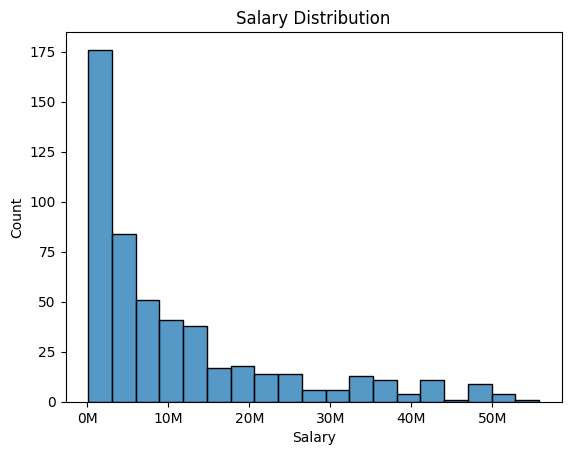

In [39]:
# Load the data
nba_perf = pd.read_csv("nba_performance.csv")
nba_salaries = pd.read_csv("nba_salaries.csv")

# Merge data sets
nba = pd.merge(nba_perf, nba_salaries, on='Player', how='inner')

# Drop columns
drop_columns = ["Rk_x", "Awards", "Player-additional", "Rk_y", "Tm", "2025-26", "2026-27", "2027-28", "2028-29", "2029-30", "Guaranteed", "-9999"]
nba = nba.drop(columns=drop_columns)

# Calculate Missing values
nba["3P%"] = nba["3P%"].apply(lambda x: 0 if pd.isna(x) else x)
nba["2P%"] = nba["2P%"].apply(lambda x: 0 if pd.isna(x) else x)
nba["FT%"] = nba["FT%"].apply(lambda x: 0 if pd.isna(x) else x)
nba["Trp-Dbl"] = nba["Trp-Dbl"].apply(lambda x: 0 if pd.isna(x) else x)

# Standardize data
num_columns = nba.select_dtypes('number').columns
scaler = MinMaxScaler()
nba[num_columns] = scaler.fit_transform(nba[num_columns])

# Prepare the Target Variable (Salary)
nba = nba.rename(columns={"2024-25": 'Salary'})
nba['Salary'] = pd.to_numeric(nba['Salary'].str.strip("$"))

# Visualize salary distribution
sns.histplot(nba['Salary'])
plt.title("Salary Distribution")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))
plt.show()

In [40]:
# New data frame with only necessary features
nba_model = nba.drop(columns=['Player', 'Team', 'Pos', 'Salary'])

# Perform KMeans
km = KMeans(n_clusters=3, random_state=45)
nba_km = km.fit(nba_model)

#### Data Visualization
**Link:**
http://127.0.0.1:40913

In [41]:
# Plot the clusters
# Variables: points, mins, field goal percentage
scatter = px.scatter_3d(nba_model, x='PTS', y='FG%', z='TRB', color = nba['Salary'], hover_name=nba['Player'], symbol=nba_km.labels_)
scatter.for_each_trace(lambda trace: trace.update(showlegend=True))
scatter.show(renderer='browser')

The code above creates a 3D visualization plotting all NBA players based three of the most important statistics that contribute to a player's salary: points, field goal percentage, and a third interchangeable variable - rebounds. I also explored visualizations with the third variable set to minutes and assists.

According to an academic article published in The Sports Journal, the two most significant statistics contributing to an NBA player's salary are points per game and field goal percentage. In addition, rebounds, assists, and personal fouls are statistically significant in predicting salary (Lyons Jr. et al., 2015).

Based on the findings in this visualization, I picked out ten players with excellent statistics that are currently not receiving salaries up to par with other high-performing players in the NBA.

### Top 10 Player Recommendations

1. **Jalen Williams**
   
    Williams is an excellent candidate for our team, boasting a very strong field goal percentage (54%). He is on contract with OKC for only $4.8 million this year and should strongly be considered before his value shoots up.

2. **Jalen Duren**
   
    Duren is a current starter for the Detroit Pistons but is only signed for a $4.5 million dollar contract this season. While he is averaging only 11 points per game, he is a very high percentage scorer (69.2% Field Goals). As a 21 year old, there is a lot of room for him to develop on our team.

3. **Alperen Sengun**
   
    Segun is an excellent option if we want to add some height to our team at Center. He has an excellent shooting average and will be a great option for facilitating the offense. For a big man, he is a great passer, rebounder, and scorer. At the Houston Rockets, his current salary is $5.4 million this season.

4. **Cam Thomas**
   
    Thomas's one year contract with the Brooklyn Nets ends this year - there he was paid $4.0 million during the 24-25 season. Thomas is the second highest scoring player on his team this season, and he is a decent three-point shooter. As a 22 year old, he will have a lot of potential to grow on our team.

5. **Paolo Banchero**
   
    Banchero is currently signed by the Orlando Magic for $12.2 million this season. However, he is the 16th highest scorer in the league and would serve as a phenomenal addition to our offense. If we are looking for a low/mid cost superstar to add to our team, Banchero is the way to go.

6. **Coby White**
   
    White is signed by the Chicago Bulls for $12.0 million this season. Like Banchero, he is a superstar being paid a low/mid salary. At point guard, White is a great passer and three-point shooter.

7. **Malik Beasley**
   
    Beasley is a current starter for the Milwaukee Bucks, but he is only being paid $6.0 million this season. Beasley boasts a phenomenal three-point percentage and could be a useful addition to our team if we are looking for a strong shooter.

8. **Jeremy Sochan**
   
    Sochan is a SA Spurs player signed at $5.6 million this year. This young star has well-rounded stats, and like Jalen Duren, has a lot of potential to develop on our team.

9.  **Chet Holmgren**
    
    Another option at Center, Holgren is an excellent rebounder and decent scorer. He is on a $10.9 contract with OKC, so bringing him to our team would be a significant but worthwhile investment.

10. **Jalen Green**
    
    Green is a top 20 scorer in the league right now playing for the Boston Celtics at $12.4 million a year. His value is anticipated to skyrocket in the next two years, so he may be worth considering for our team now if we are looking to bring on a shooting guard.


### Conclusion

If we do not sign some of these great players soon, someone else will. It's only a matter of time before other teams realize these high-performers are being underpaid - we need to evaluate these top ten options right now and spring on this opportunity before it's too late.